# Bicol University Workshop: Exploratory Data Analysis (Part 2)
Prepared by: John Raymond B. Barajas

## Confidentiality Notice

This Jupyter Notebook and its contents are confidential and intended solely for the use of the intended recipient(s). If you have received this Notebook in error, please notify the sender immediately and delete it from your system. Any unauthorized use, disclosure, copying, or distribution of this Notebook is strictly prohibited.

The information contained in this Notebook may be privileged and confidential, and is intended only for the named recipient(s). Any review, dissemination, distribution, or copying of this Notebook by anyone other than the intended recipient(s) is strictly prohibited.

The content and opinions expressed in this Notebook are those of the author(s) and may not necessarily reflect the official policies or positions of the organization. Any views or opinions presented in this Notebook are solely those of the author(s) and do not necessarily represent those of the organization.

The security and integrity of the content of this Notebook cannot be guaranteed, and the author(s) shall not be held responsible for any unauthorized modification or alteration of the content.

Please treat this Notebook and its contents with the utmost confidentiality and refrain from sharing or distributing it without explicit permission from the author(s) or the organization.

Thank you for your cooperation and understanding.

## Install Necessary Libraries

In [17]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib
# !pip install seaborn
# !pip install ipywidgets
# !pip install scikit-learn
# !pip install scipy
# !pip install "numpy<1.24"

## Import Necessary Libraries

In [18]:
# import the necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Code for Columns

To navigate easily on the `entry_survey_data.csv`, the following are the codes used for the columns:

| QUESTION                                                        | CODE           |
|:-----------------------------------------------------------------|:----------------|
| Questionnaires                                                  | SURVEY_NAME    |
| Birthdate (Year, Month, Day)                                    | BIRTHDATE      |
| Sex at birth as appearing in the Certificate of Live Birth       | SEX            |
| Gender Preference                                               | GENDER         |
| Are you a member of an indigenous or cultural group?             | Q1             |
| Permanent or home address                                       | ADDRESS        |
| Estimated monthly family income                                 | FAMILY_INCOME  |
| Are you currently working either part-time or full-time?         | Q2             |
| School                                                          | SCHOOL         |
| Type of Institution                                             | SCHOOL_TYPE    |
| Academic Status                                                 | ACADEMIC_STATUS|
| Course specialization                                           | COURSE         |
| Which of the following are you currently availing this semester? (Specify other scholarship if applicable) | Q3 |
| Is this the first time that you are availing of FHE or TES?      | Q4             |
| How aware are you about the guidelines of the Universal Access to Quality Education (UAQTE)? | Q5 |
| Which of the following reasons do you think qualified you for Free Higher Education Program (FHE) or Tertiary Education Subsidy (TES)? Check as many as you think applies: | Q6 |
| Is the Free Higher Education Program (FHE) or Tertiary Education Subsidy (TES) enough to support your schooling? | Q7 |
| If Free Higher Education Program (FHE), Tertiary Education Subsidy (TES), and/or other scholarships were not available, how would you be supporting your studies? | Q8 |
| What aspect of your schooling should UAQTE include in its support? | Q9 |

## Explore the Numerical and Categorical Data

### Read Survey Data

In [141]:
# read survey data
file_path = 'entry_survey_clean_data.csv'
df = pd.read_csv(file_path)

### Check Metadata of Survey Data

In [142]:
# check the first 5 rows of the data
df.head(5)

,BIRTHDATE,SEX,GENDER,Q1,Q1_YES,Q1_OTHER,ADDRESS,FAMILY_INCOME,Q2,SCHOOL,...,Q3_Tertiary Education Subsidy (TES),Q6_My family socioeconomic status,Q6_My enrollment in state/government school,Q6_The type of course I am enrolled in,Q6_Others,Q9_Uniform,Q9_Books and other school materials,Q9_Subsidy for school activities,Q9_Others,AGE
0,2002,Male,Woman,Yes,NaN,NaN,"Camarines Norte,Basud,Lidong","Less than 50,000",Yes,Bicol University-Main,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21
1,2002,Female,Woman,No,NaN,NaN,"Albay,Camalig,Ilawod","Less than 50,000",No,Bicol University-Main,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,21
2,2001,Female,Woman,No,NaN,NaN,"Albay,Daraga (Locsin),Sagpon","Within 50,000 - 100,000",No,Bicol University-Main,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22
3,2002,Male,Woman,No,NaN,NaN,"Albay,Bacacay,Barangay 13 (Pob.)","Less than 50,000",No,Bicol University-Main,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,21
4,2001,Female,Woman,No,NaN,NaN,"Camarines Sur,Bato,Santiago (Pob.)","Within 50,000 - 100,000",No,Bicol University-Main,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22


In [143]:
# check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   BIRTHDATE                                    750 non-null    int64  
 1   SEX                                          750 non-null    object 
 2   GENDER                                       750 non-null    object 
 3   Q1                                           750 non-null    object 
 4   Q1_YES                                       4 non-null      object 
 5   Q1_OTHER                                     90 non-null     object 
 6   ADDRESS                                      750 non-null    object 
 7   FAMILY_INCOME                                750 non-null    object 
 8   Q2                                           750 non-null    object 
 9   SCHOOL                                       750 non-null    object 
 10  SC

### Perform Exploratory Data Analysis on Survey Data

#### Inspect Distribution of Numerical Columns

In [145]:
# identify columns which are categorical
cat = df.select_dtypes(['object','category']).columns.to_list()

# identify columns which are numerical
num = df.select_dtypes(['number']).columns.to_list()

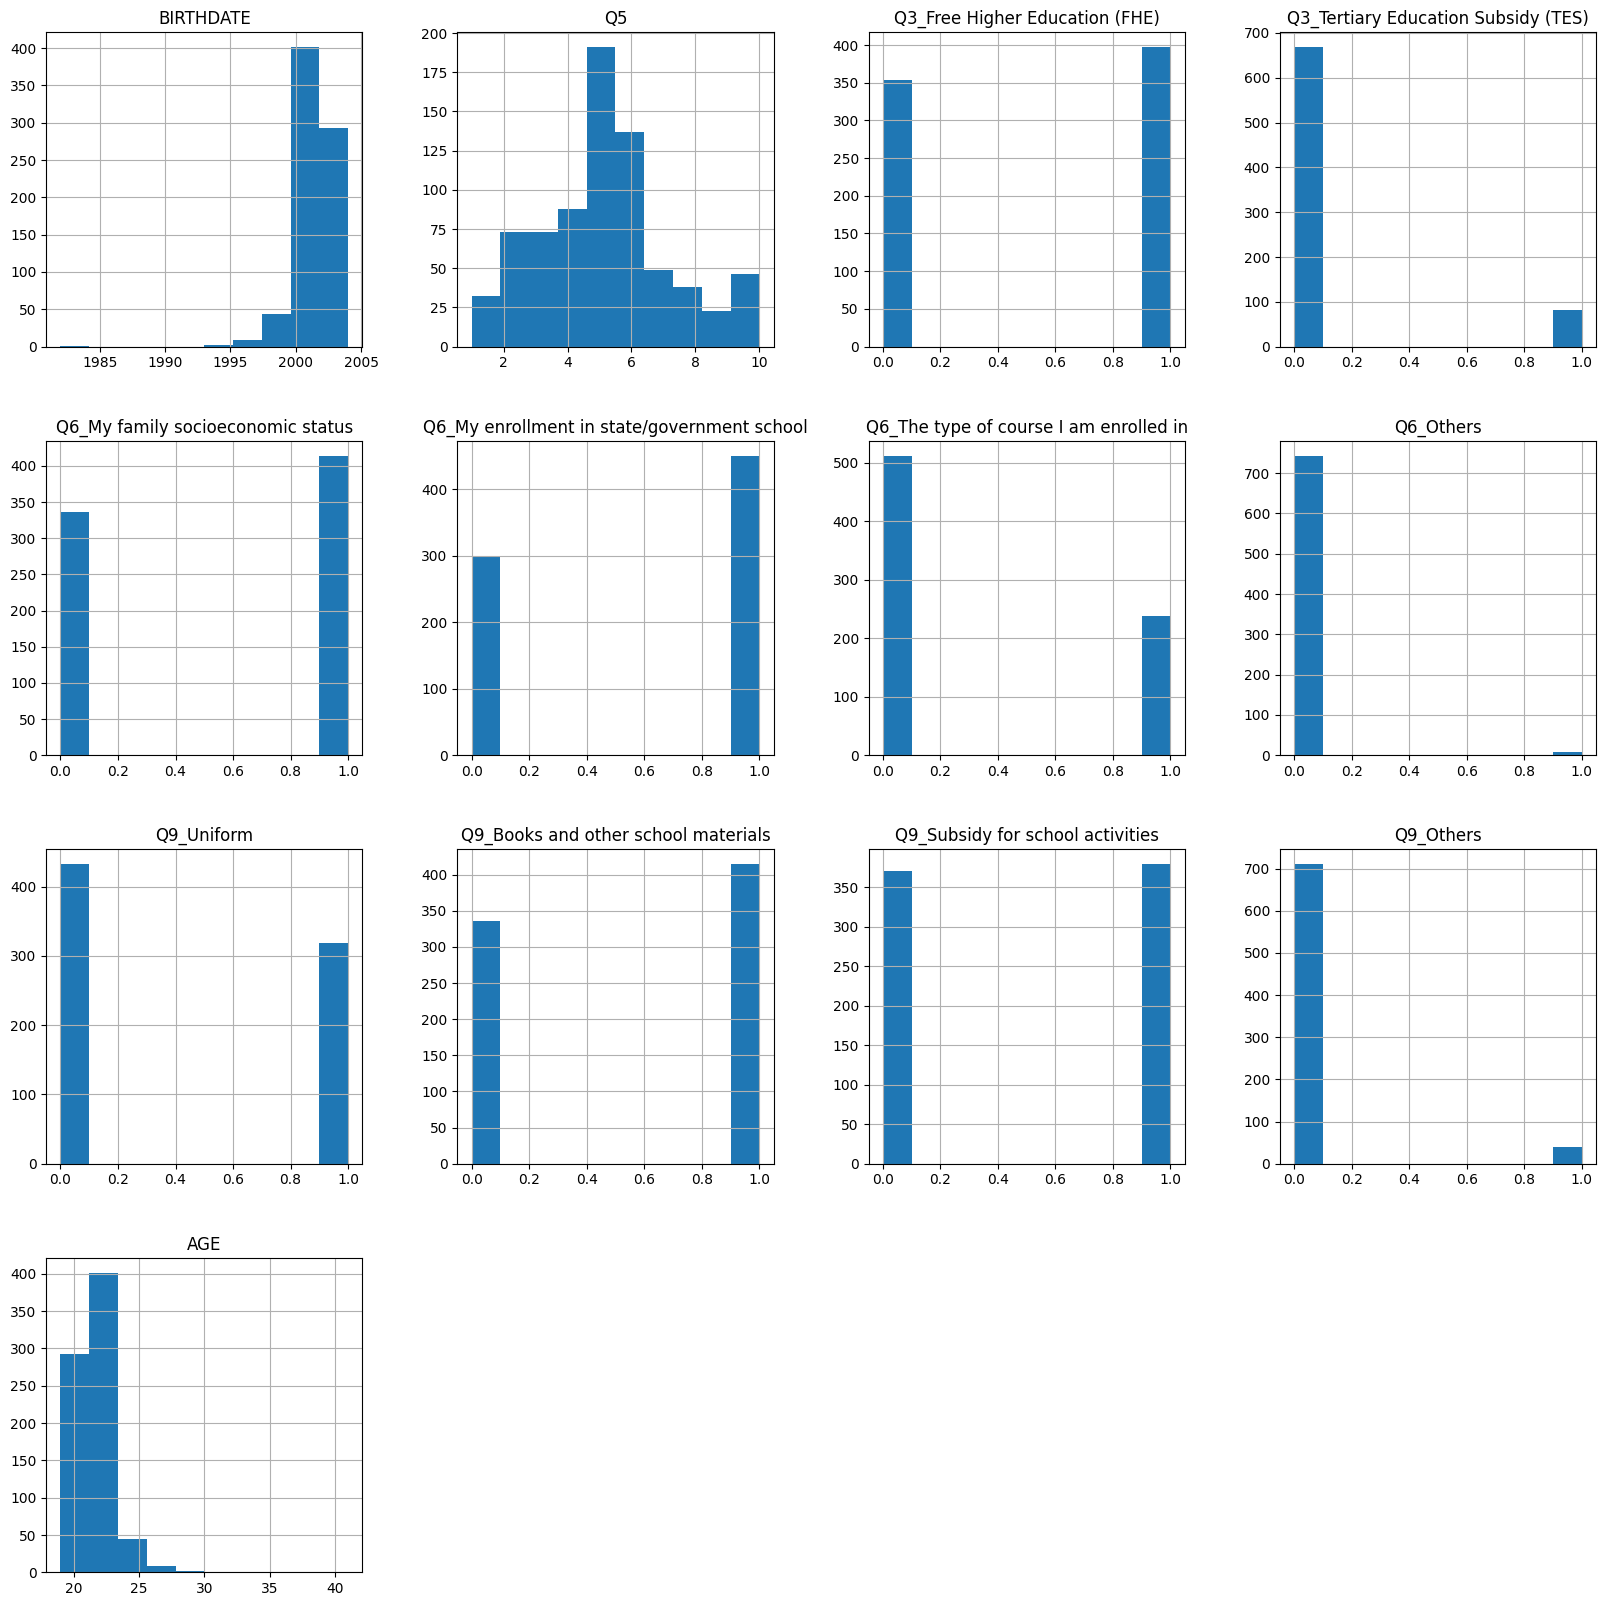

In [146]:
# inspect distribution of Numerical Data
# note that for data of larger size, this will take a while to execute
df[num].hist(figsize=(20,20), xrot=0);

#### Inspect Distribution of Categorical Columns

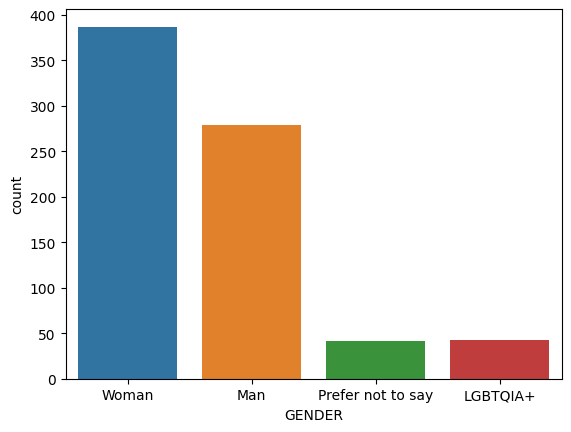

In [150]:
# inspect distribution GENDER
ax = sns.countplot(x='GENDER', data=df)
ax.tick_params(axis='x', rotation=0)

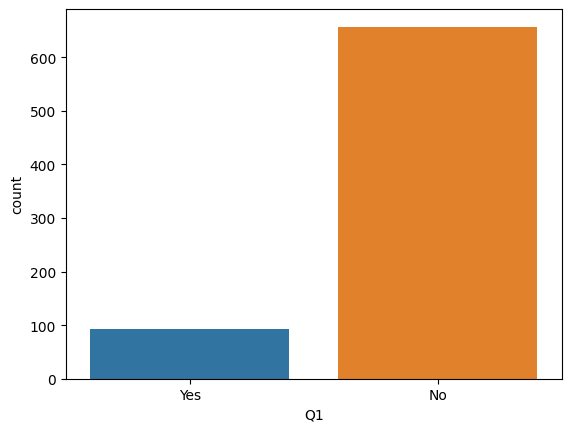

In [151]:
# inspect distribution Q1
ax = sns.countplot(x='Q1', data=df)
ax.tick_params(axis='x', rotation=0)

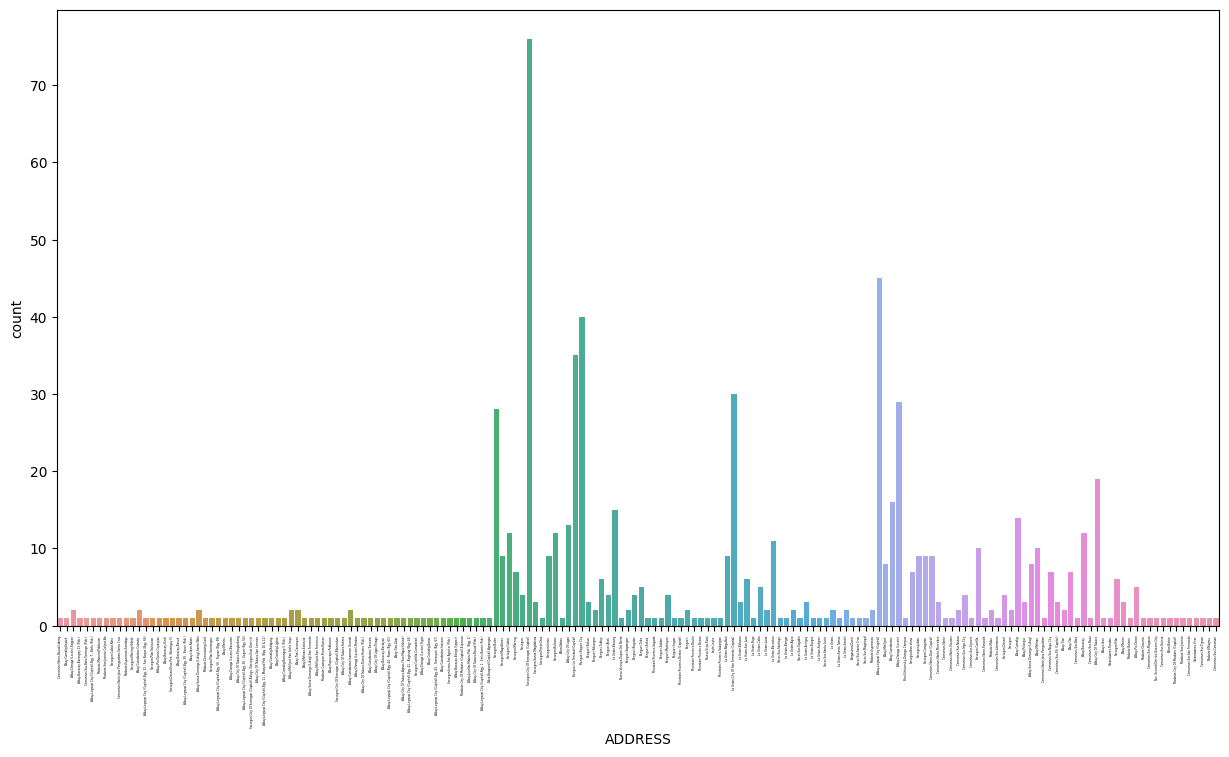

In [154]:
# inspect distribution ADDRESS
plt.figure(figsize=(15,8))
ax = sns.countplot(x='ADDRESS', data=df)
ax.tick_params(axis='x', rotation=90, labelsize=2)

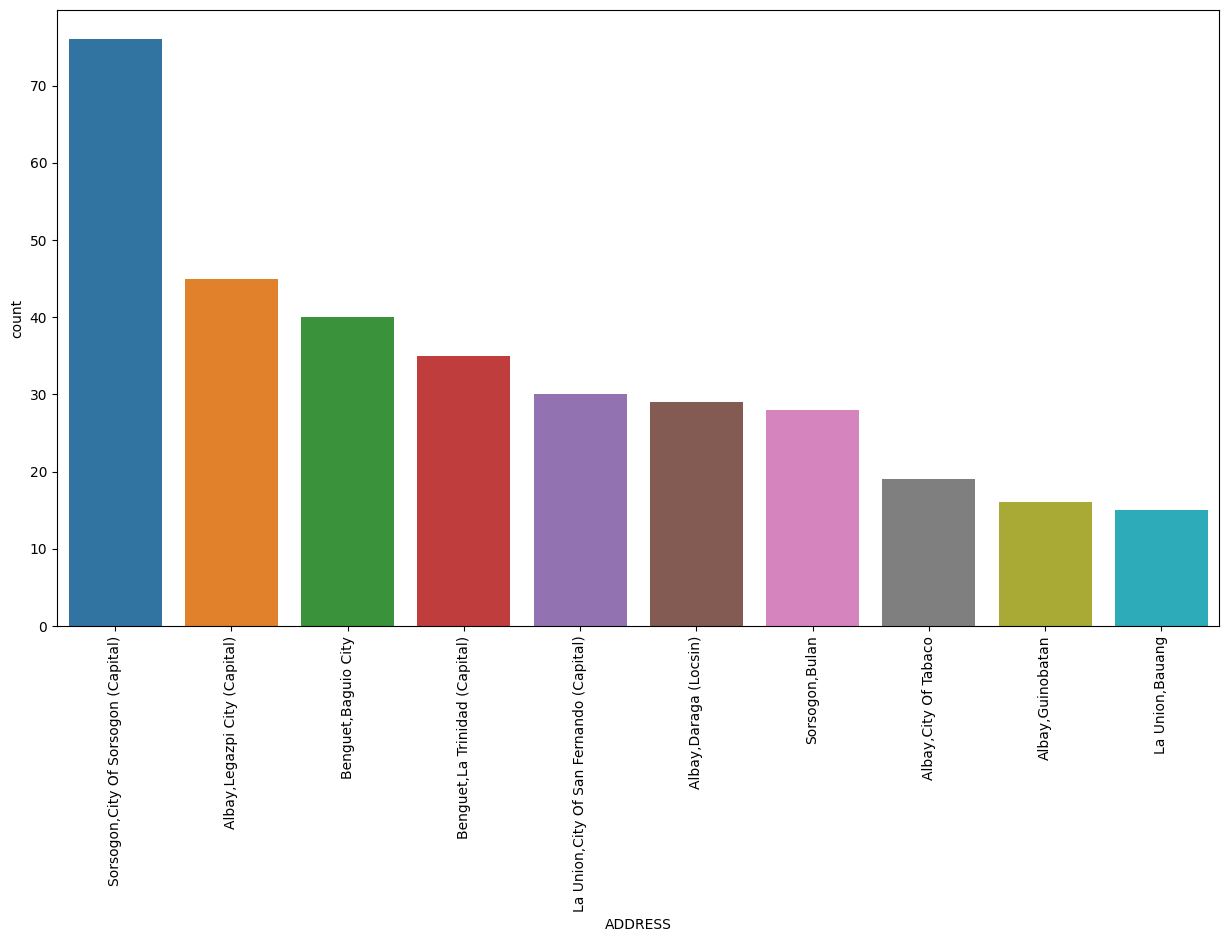

In [156]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='ADDRESS', data=df, order=df['ADDRESS'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

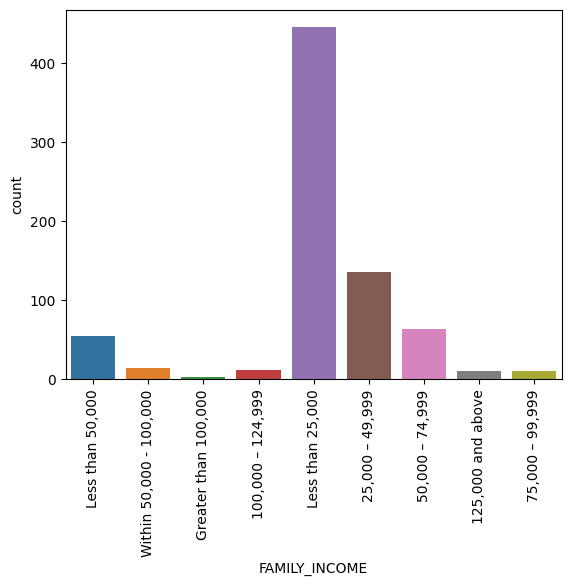

In [158]:
# inspect distribution FAMILY_INCOME
ax = sns.countplot(x='FAMILY_INCOME', data=df)
ax.tick_params(axis='x', rotation=90)

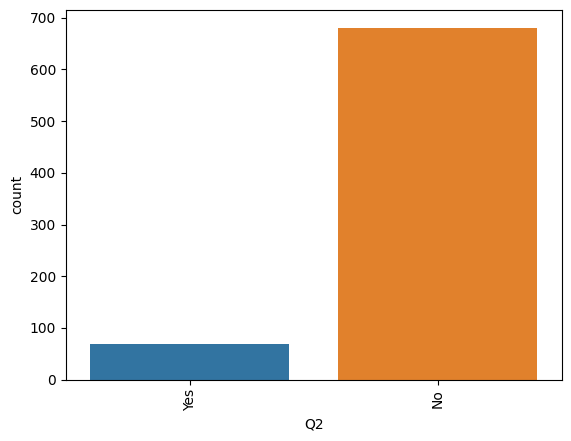

In [160]:
# inspect distribution Q2
ax = sns.countplot(x='Q2', data=df)
ax.tick_params(axis='x', rotation=90)

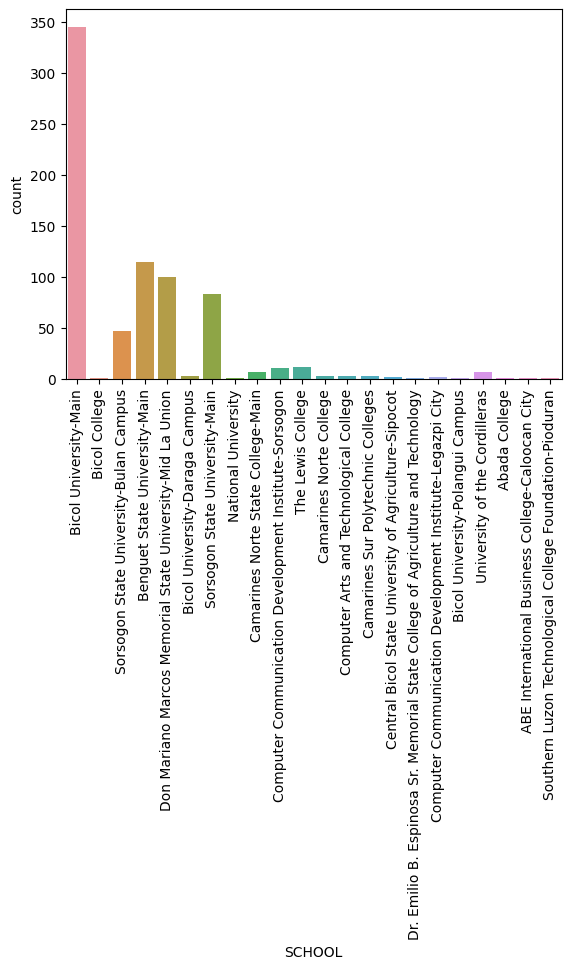

In [161]:
# inspect distribution SCHOOL
ax = sns.countplot(x='SCHOOL', data=df)
ax.tick_params(axis='x', rotation=90)

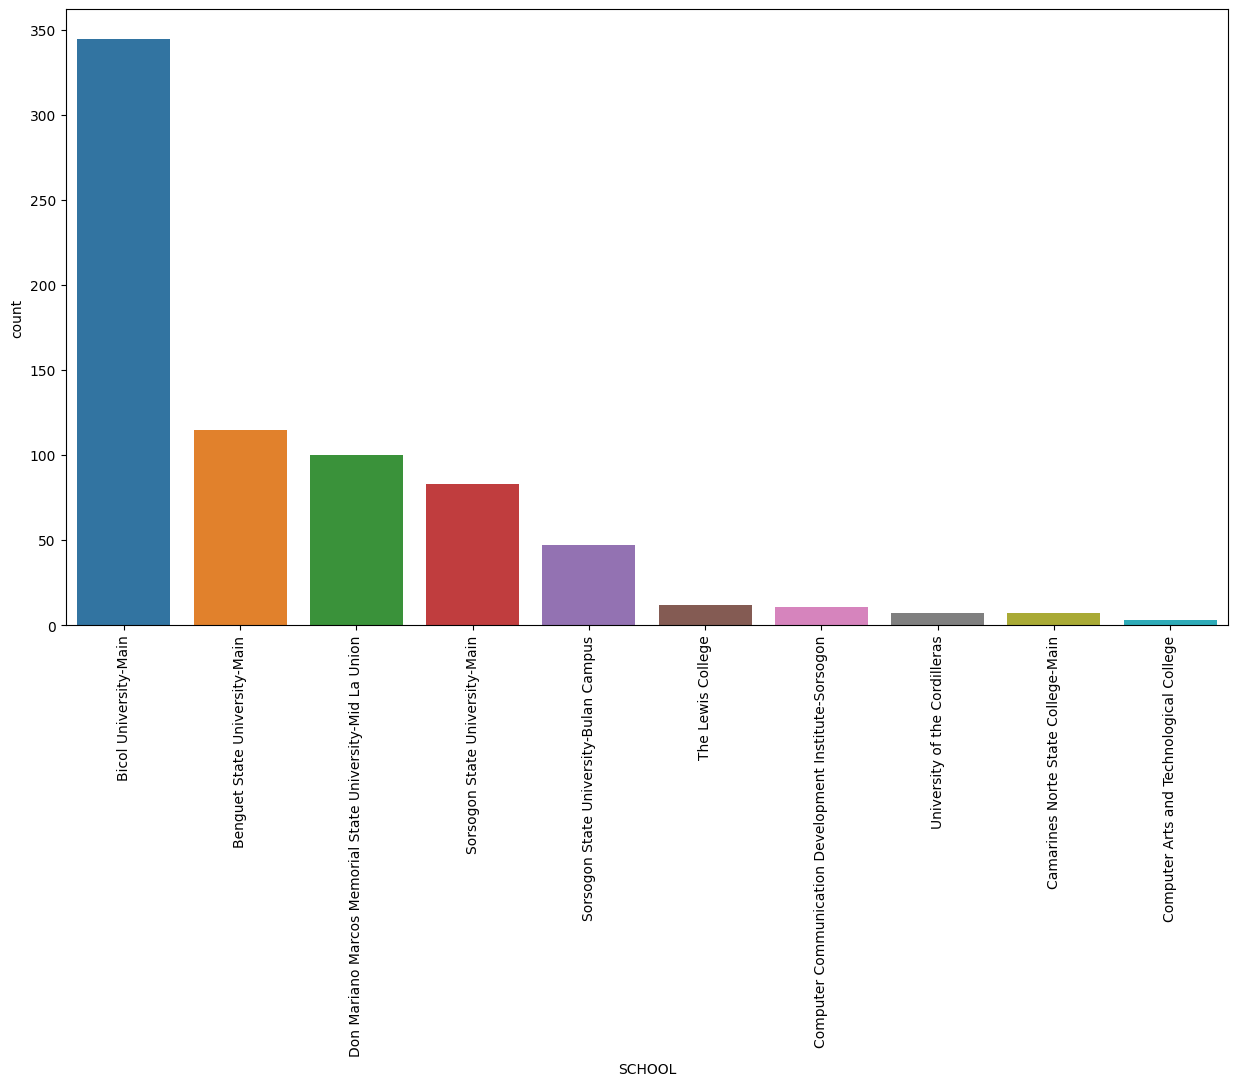

In [162]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='SCHOOL', data=df, order=df['SCHOOL'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

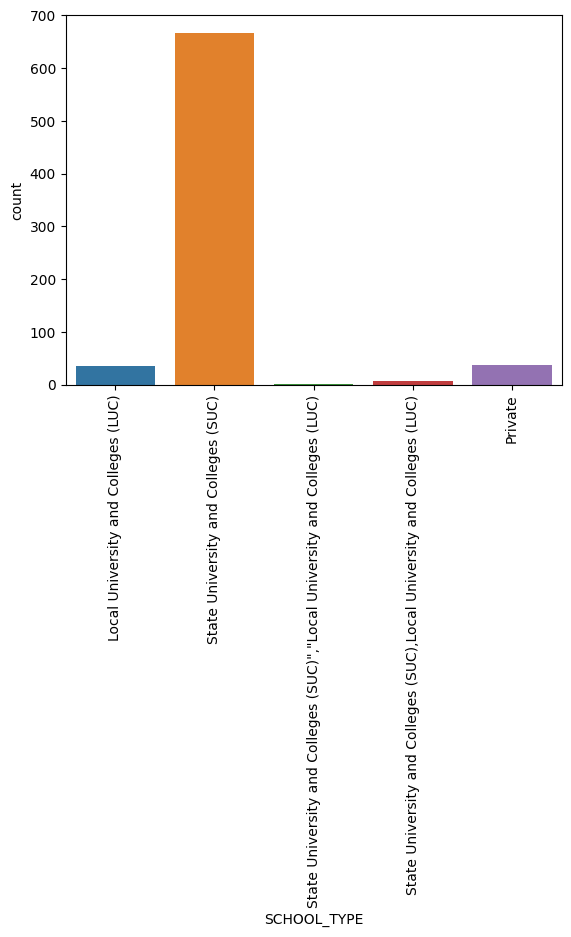

In [163]:
# inspect distribution SCHOOL_TYPE
ax = sns.countplot(x='SCHOOL_TYPE', data=df)
ax.tick_params(axis='x', rotation=90)

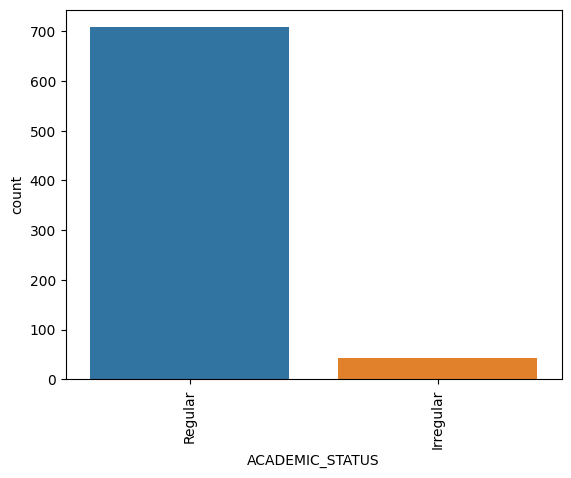

In [164]:
# inspect distribution ACADEMIC_STATUS
ax = sns.countplot(x='ACADEMIC_STATUS', data=df)
ax.tick_params(axis='x', rotation=90)

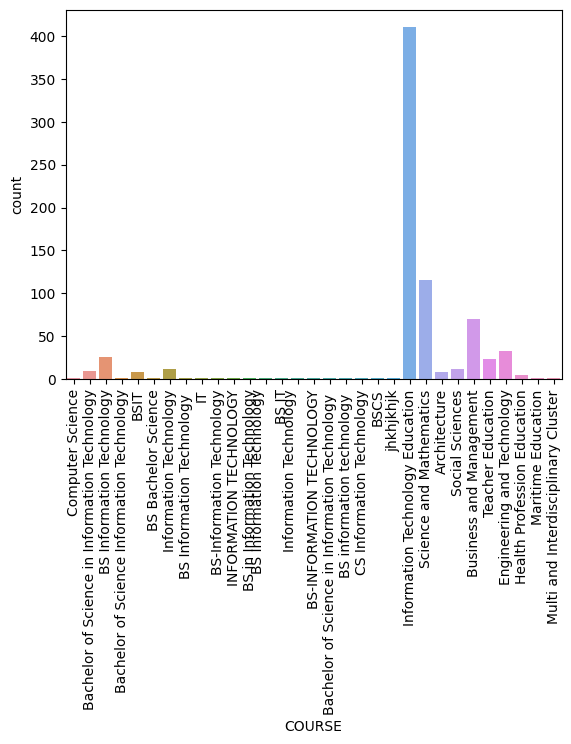

In [165]:
# inspect distribution COURSE
ax = sns.countplot(x='COURSE', data=df)
ax.tick_params(axis='x', rotation=90)

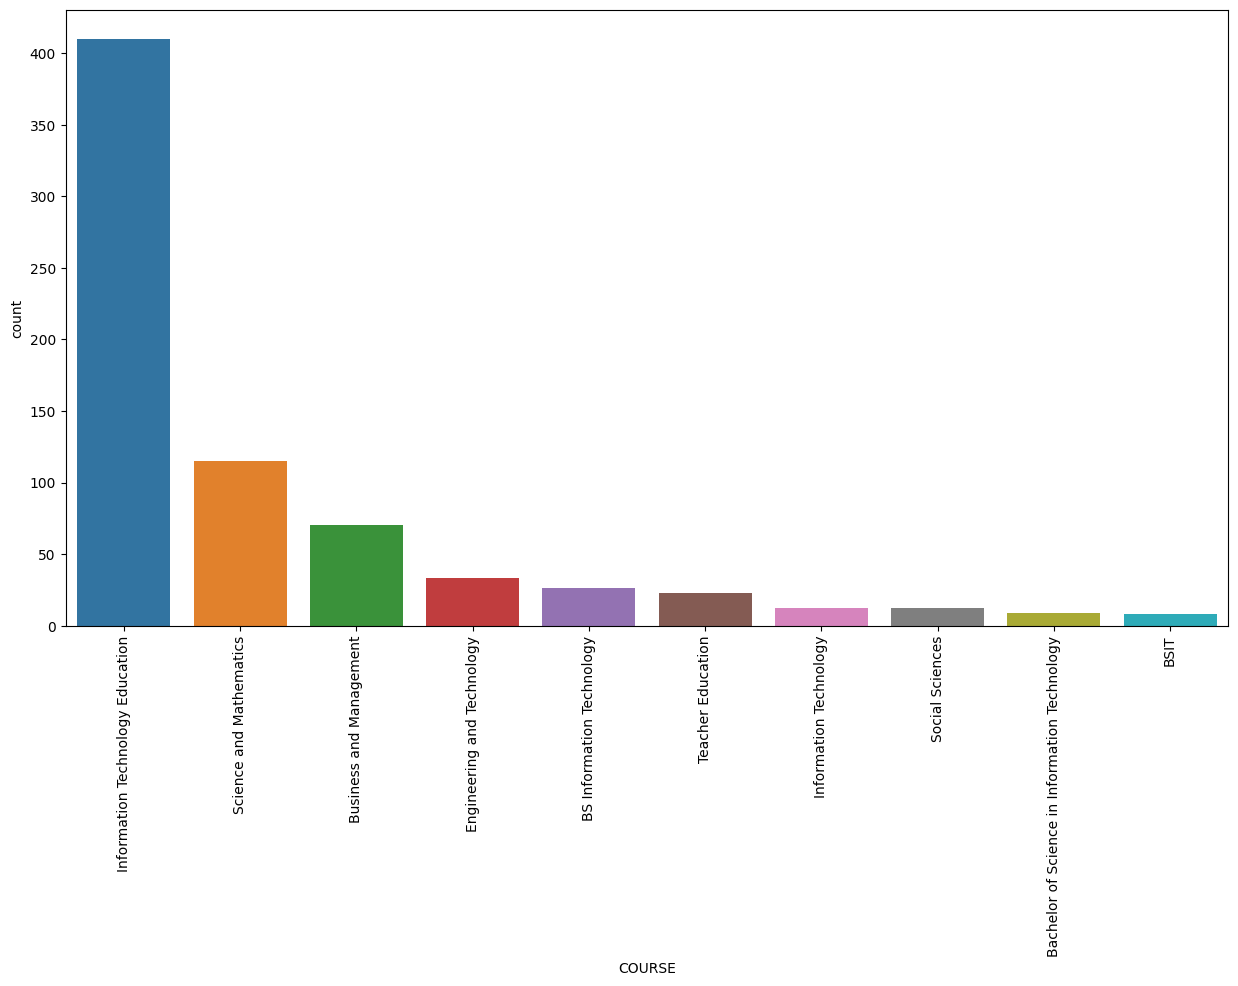

In [166]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='COURSE', data=df, order=df['COURSE'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

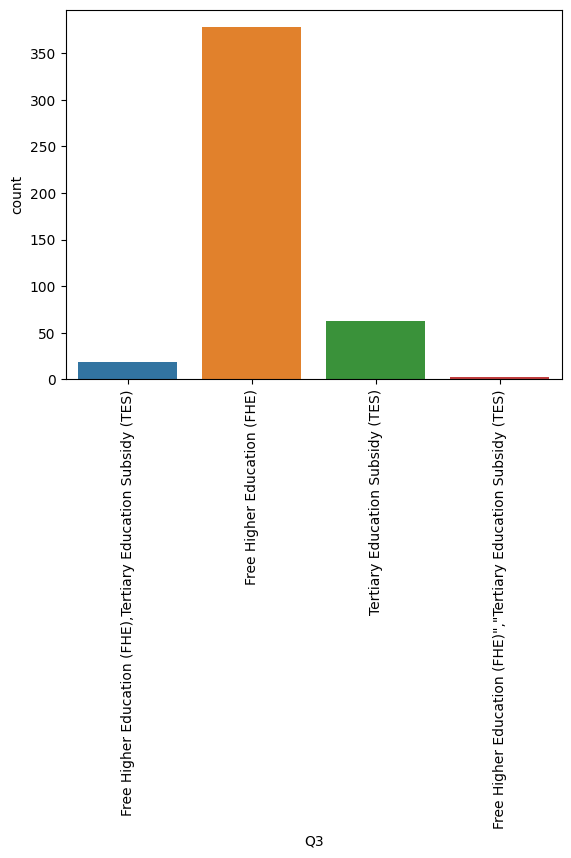

In [167]:
# inspect distribution Q3
ax = sns.countplot(x='Q3', data=df)
ax.tick_params(axis='x', rotation=90)

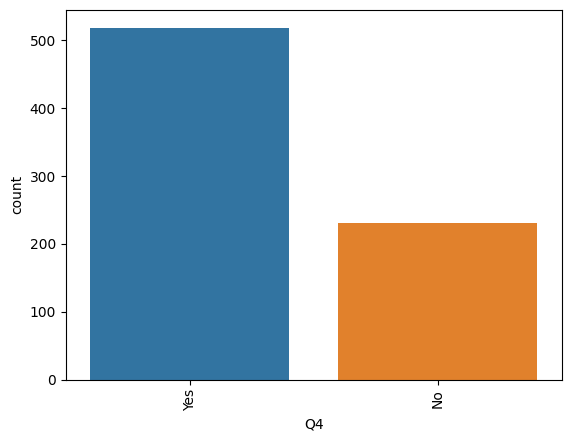

In [168]:
# inspect distribution Q4
ax = sns.countplot(x='Q4', data=df)
ax.tick_params(axis='x', rotation=90)

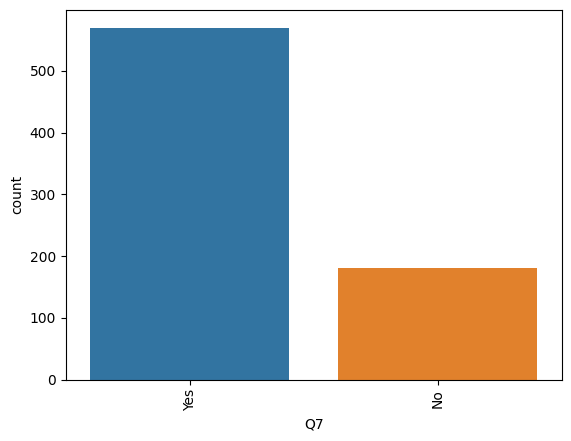

In [172]:
# inspect distribution Q7
ax = sns.countplot(x='Q7', data=df)
ax.tick_params(axis='x', rotation=90)

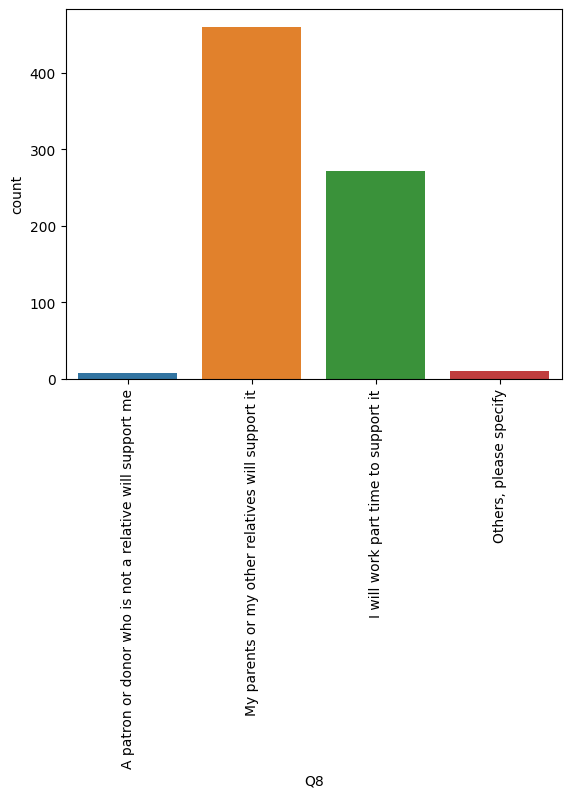

In [173]:
# inspect distribution Q8
ax = sns.countplot(x='Q8', data=df)
ax.tick_params(axis='x', rotation=90)

#### Plot Correlation Matrix

The purpose of a correlation matrix in diagnostic analytics is to analyze and understand the relationships between variables in a dataset.

In a nutshell, a correlation matrix provides a numerical measure of the strength and direction of the linear relationship between pairs of variables. It helps to identify whether variables are positively or negatively correlated, and the magnitude of the correlation.

It is important to note that correlation does not imply causation. While a high correlation between two variables suggests a relationship, it does not necessarily imply a cause-and-effect relationship.

Here is some guide on how to interpret a correlation matrix as based on this [reference](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8).

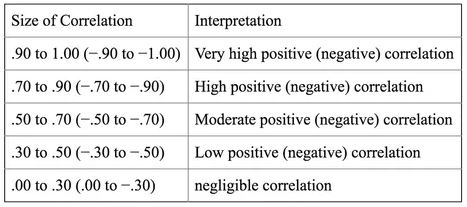

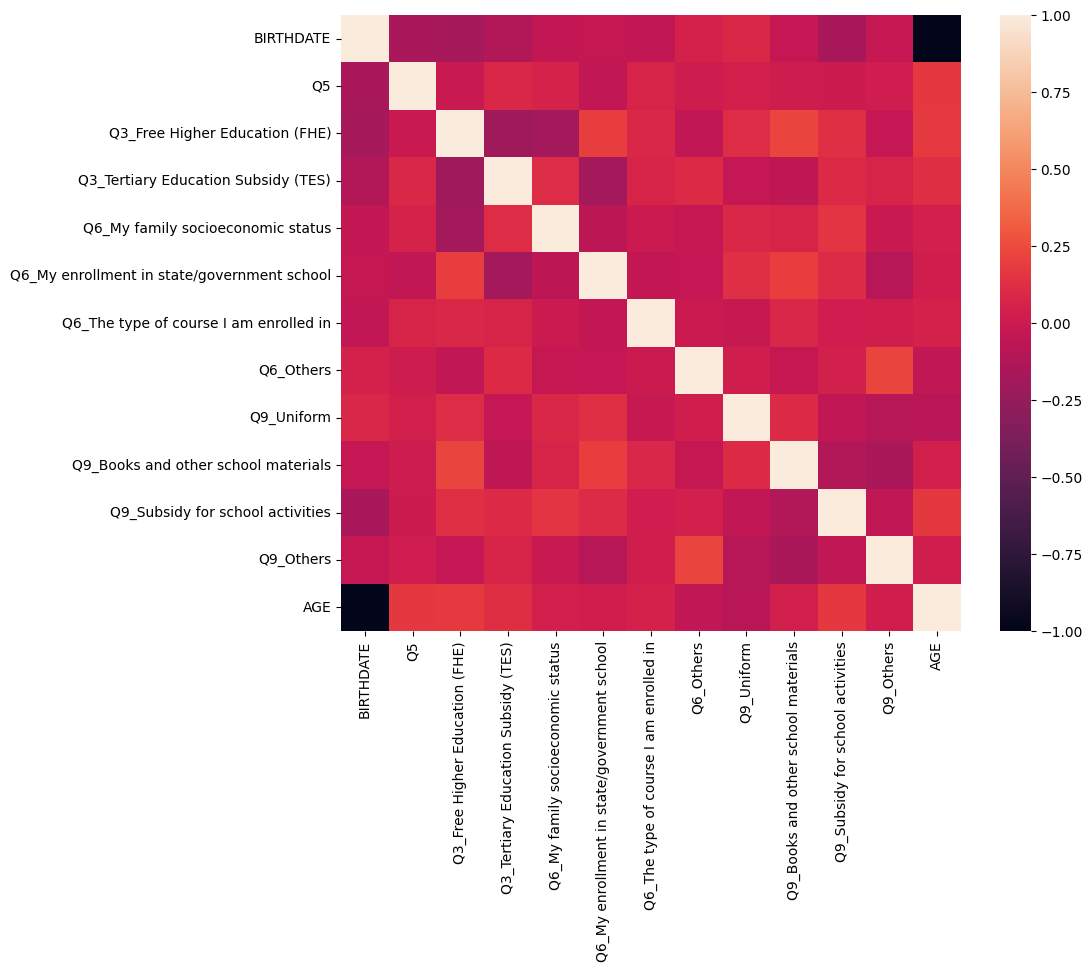

In [174]:
# create new dataframe
df_corr = df.copy(deep=True)

# get correlation matrix
corr = df_corr.corr(numeric_only=True)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr)

#### Plot Pair Plot

A pair plot is a visual tool used to explore the relationships between multiple variables in a dataset. It is a type of scatter plot matrix that displays pairwise relationships between variables, where each variable is compared with every other variable in the dataset.

The primary use of a pair plot in diagnostic analytics is to identify patterns, correlations, and potential outliers in the data. By visually examining the scatter plots, analysts can quickly assess the strength and direction of relationships between variables. They can detect any linear or nonlinear associations, clusters, or trends within the dataset.

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


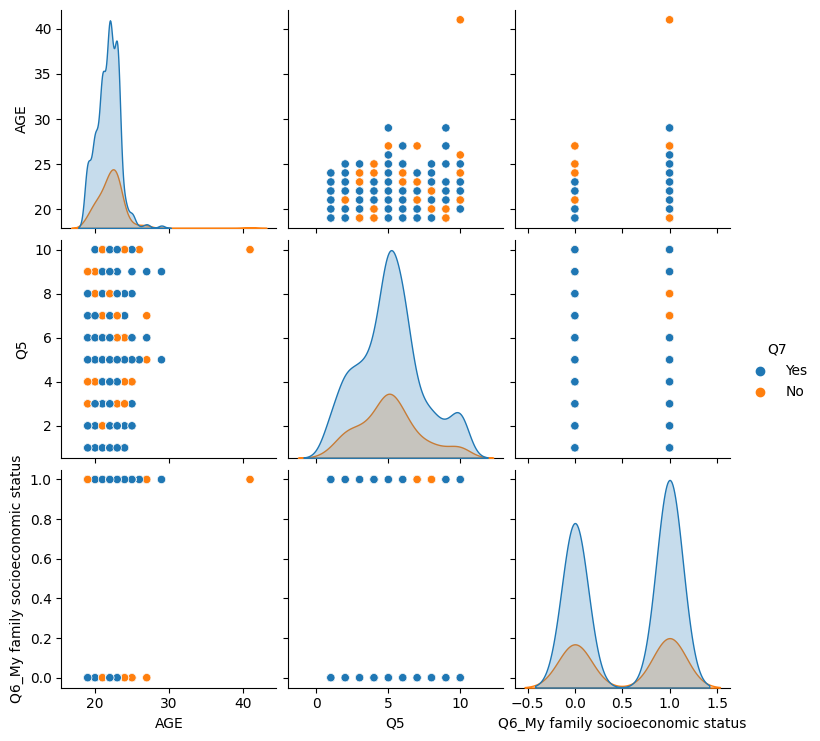

In [180]:
# create pairplot for select features (Q7)
col_select = ['AGE', 'Q5', 'Q6_My family socioeconomic status', 'Q7']
sns.pairplot(df[col_select], hue='Q7');

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


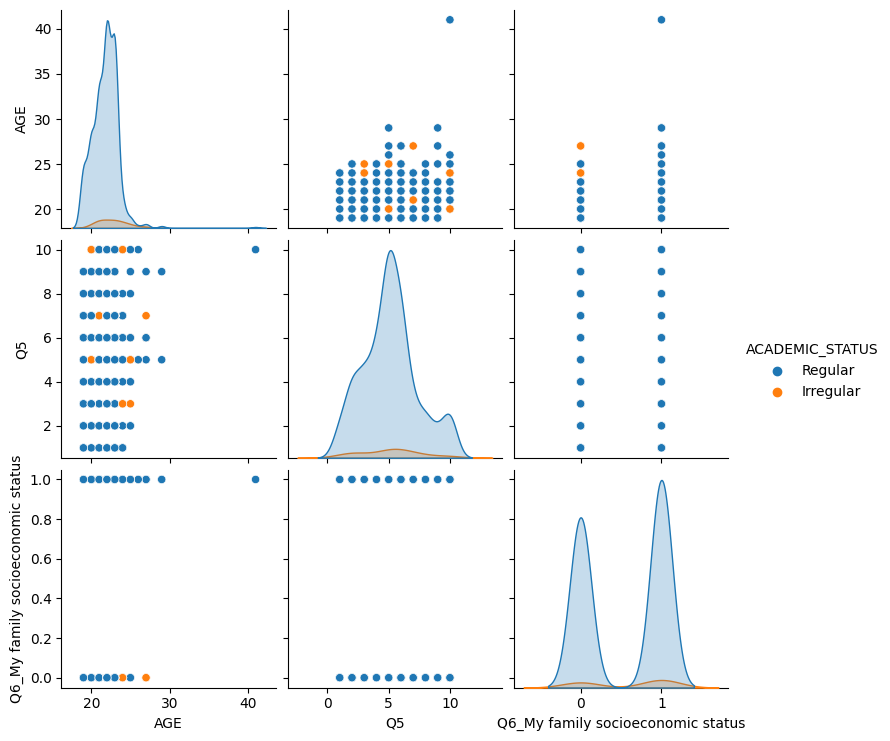

In [182]:
# create pairplot for select features (ACADEMIC_STATUS)
col_select = ['AGE', 'Q5', 'Q6_My family socioeconomic status',
              'ACADEMIC_STATUS']
sns.pairplot(df[col_select], hue='ACADEMIC_STATUS');

#### Plot Box Plot

As taken from this [website](https://help.ezbiocloud.net/box-plot/), the following image explains how to interpret a boxplot.

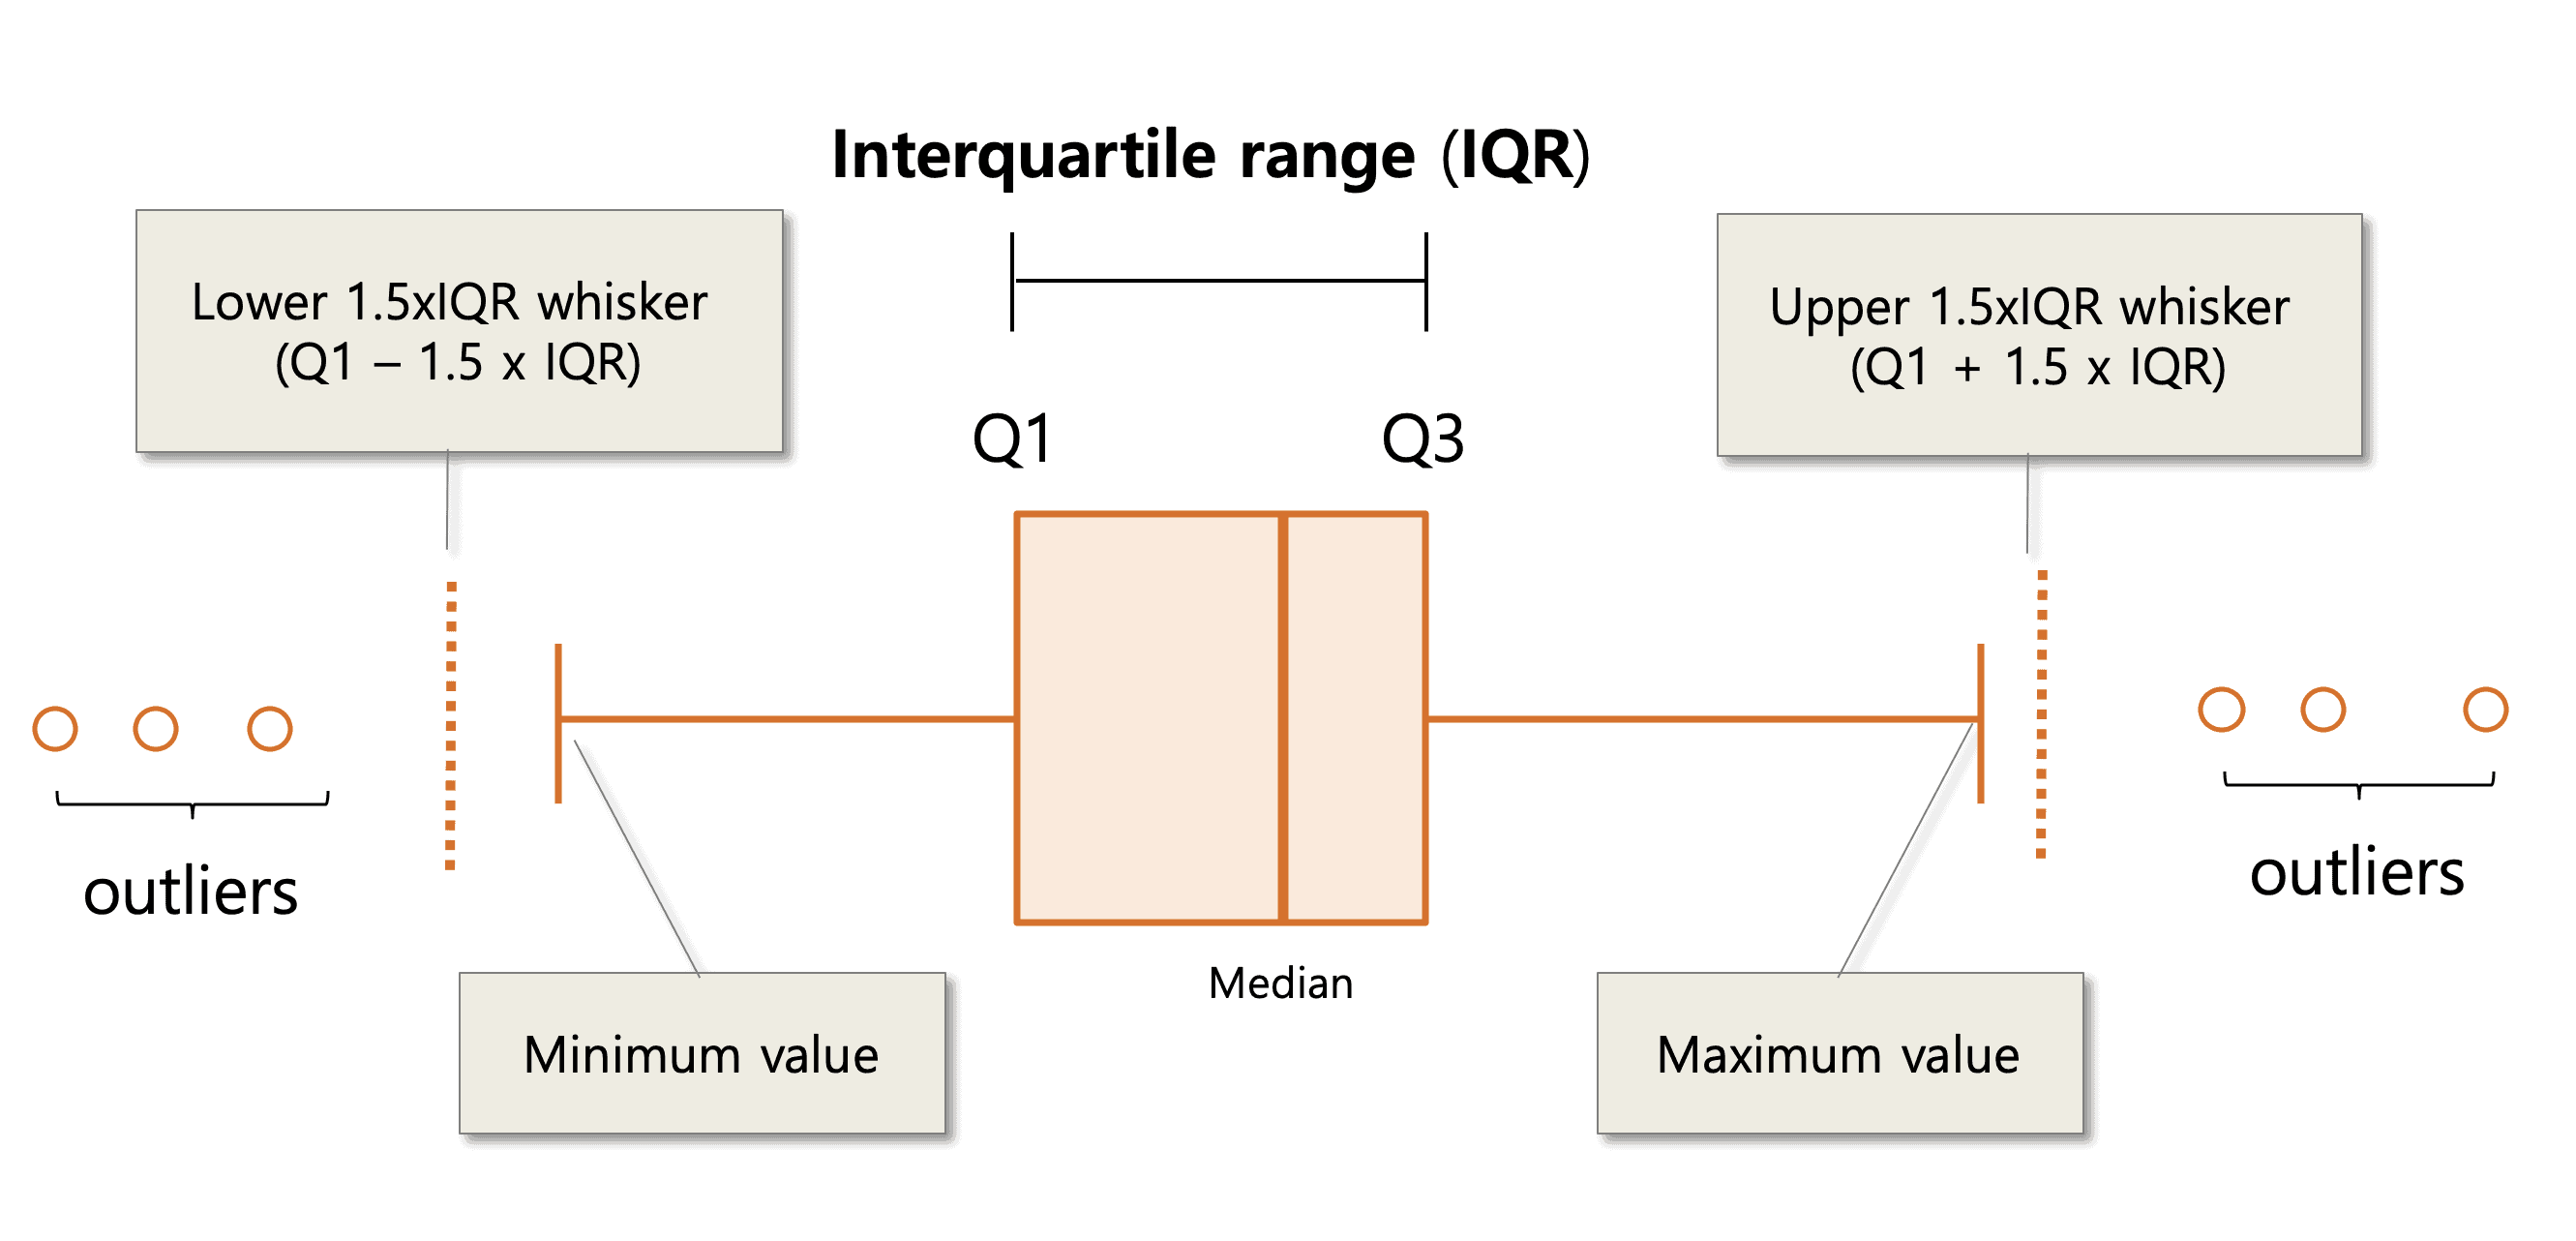

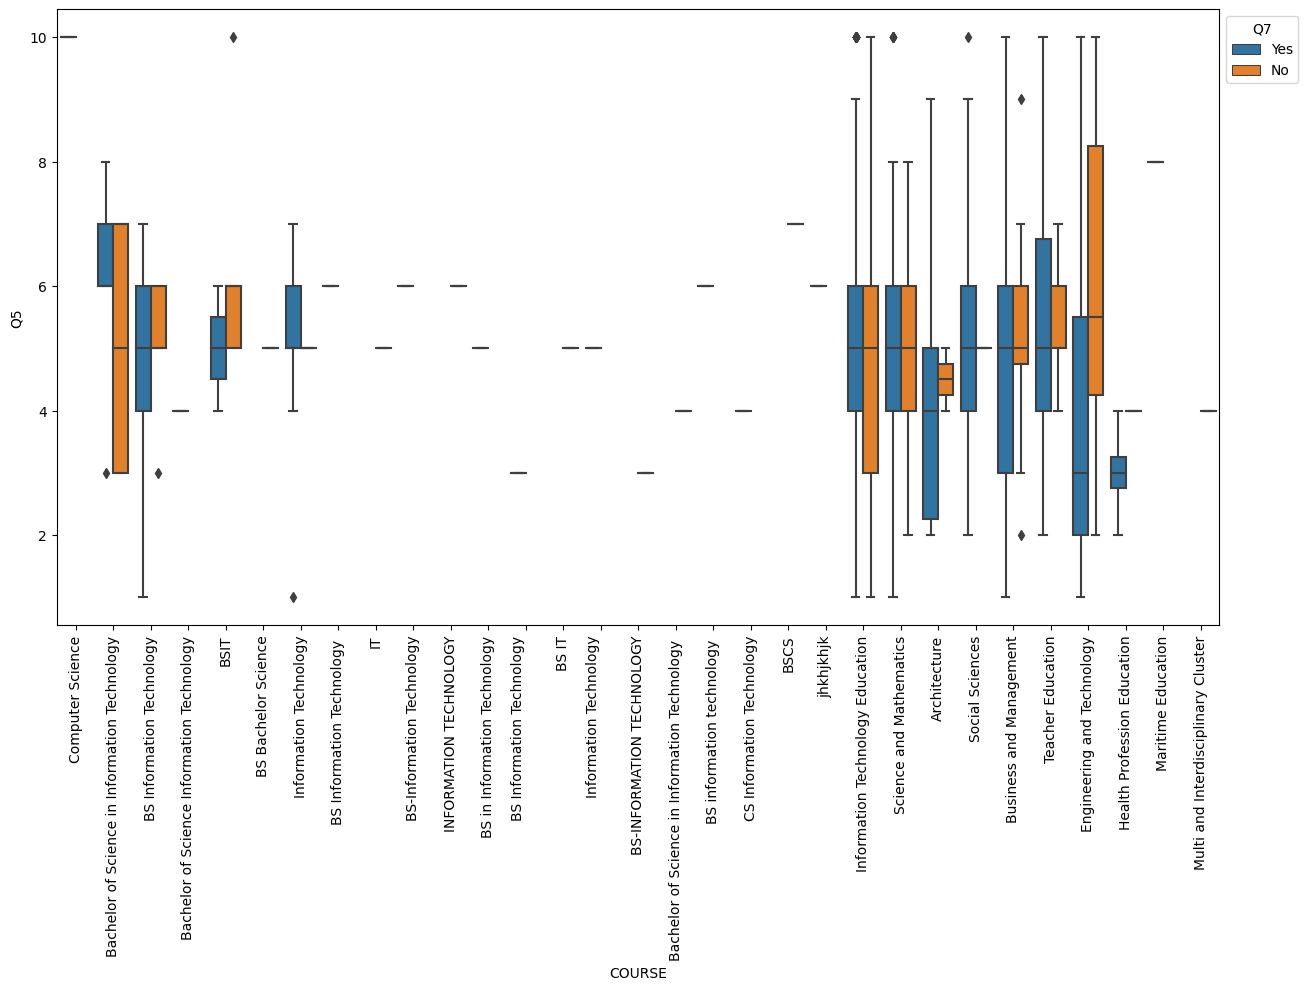

In [186]:
# crete box plot for Q5
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df, x="COURSE", y="Q5", hue='Q7')
ax.tick_params(axis='x', rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Plot Swarm Plot

A swarm plot, also known as a beeswarm plot, is a type of categorical scatter plot that displays the distribution of data points along a categorical variable. It is particularly useful when visualizing the relationship between a categorical variable and a continuous variable.

In a swarm plot, each data point is plotted as a dot, and they are aligned along the categorical axis without overlapping. The dots are spread out horizontally to avoid overlap and provide a clear representation of the data distribution. The vertical position of each dot represents the value of the continuous variable.

The swarm plot allows for the identification of patterns, clusters, and outliers within different categories of the categorical variable. By visualizing the distribution of the continuous variable within each category, analysts can gain insights into the variability and characteristics of the data.

Swarm plots are especially beneficial when the categorical variable has a relatively small number of unique values. They provide a clearer representation of the data distribution compared to traditional scatter plots when dealing with categorical variables.

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


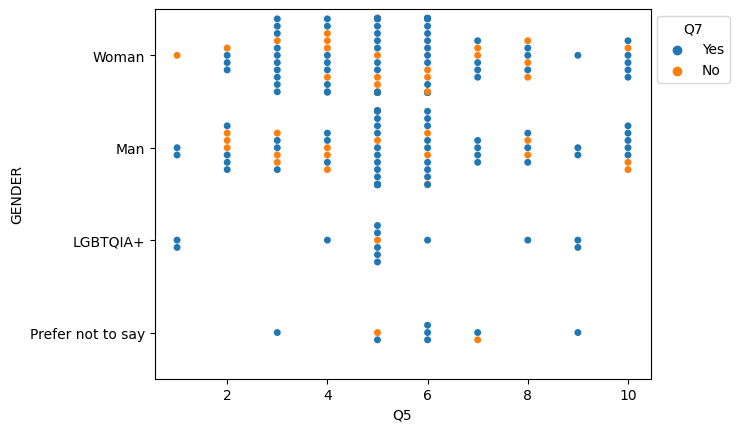

In [188]:
# Draw a categorical scatterplot to show each observation
# Note that the data has been sampled for faster runtime; this code takes a while to execute
ax = sns.swarmplot(data=df.sample(200, random_state=1334), x="Q5", y="GENDER", hue="Q7", s=5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Relational Plots

`sns.relplot` is a versatile plotting function provided by the Seaborn library in Python. It allows for the creation of various relational plots, such as scatter plots and line plots, to explore the relationship between multiple variables in a dataset.

With `sns.relplot`, you can visualize the relationship between two continuous variables using a scatter plot, where each data point is represented as a point on the plot. Additionally, you can incorporate additional dimensions of the data by using different parameters, such as color, size, or shape of the markers, to represent categorical variables or continuous variables.

The `sns.relplot` function provides flexibility in terms of plot types, allowing you to choose between different plot styles, including scatter plots, line plots, and combination plots. It also offers options to facet the plot by additional categorical variables, creating a grid of plots that allows for easy comparison across different subsets of the data.

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


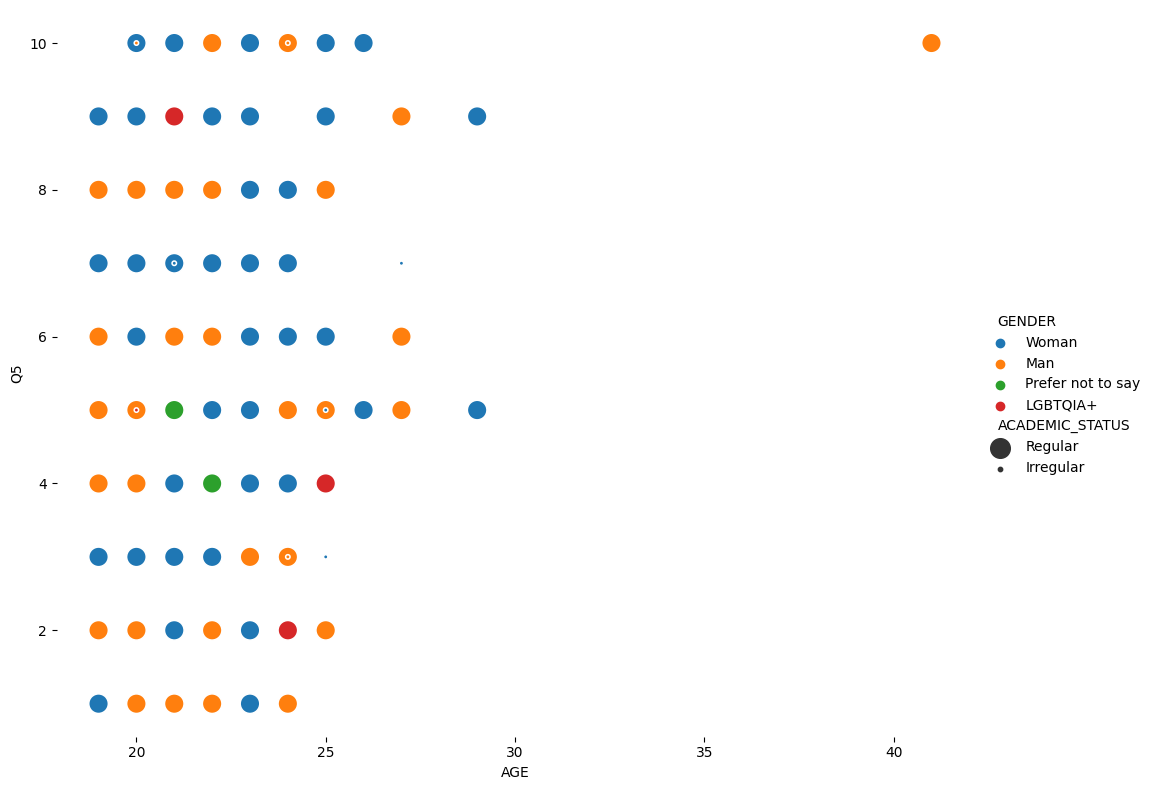

In [194]:
# create relational plot for SEX_M, SEX_F, HEI_TYPE, and TOTAL_GRANTEES
ax = sns.relplot(data=df, x="AGE", y="Q5", hue="GENDER",
                 size='ACADEMIC_STATUS', sizes=(10,200), height = 8,
                 aspect = 1.25)
ax.ax.xaxis.grid(True, "minor", linewidth=.25)
ax.ax.yaxis.grid(True, "minor", linewidth=.25)
ax.despine(left=True, bottom=True)

## Activity (By Group)

Form groups of 4-5 members and try to rerun this notebook for the exit survey data (`exit_survey_clean_data.csv`). Choose any 3 figures from your exploration (chosen figures may be the same from other groups) and answer the following as well:
- What do your chosen figures tell you?
- What insights do you think can be drawn from your chosen figure?

Presentation Instructions (to be presented in the morning Day 2 of the workshop):

- Prepare a PowerPoint (PPT) presentation with 4-5 slides based on your findings.
- 2 groups will be called to present their findings.
- Each group is given 5-7 minutes to present their findings.
- Ensure your presentation includes:
    - Slide 1: Introduction (briefly explain the purpose of the dataset)
    - Slide 2: Show first chosen figure and the findings for it
    - Slide 3: Show second chosen figure and the findings for it
    - Slide 4: Show third chosen figure and the findings for it
 
For reference, the data is given below:

In [2]:
file_path = 'exit_survey_clean_data.csv'
df_exit = pd.read_csv(file_path)
df_exit.head(5)

,BIRTHDATE,SEX,GENDER,Q1,Q1_OTHER,ADDRESS,FAMILY_INCOME,Q2,SCHOOL,SCHOOL_TYPE,...,Q14_OTHER,Q5_International employment,Q5_Establish own business,Q5_Others,Q5_Obtain scholarship for graduate school,Q5_local employment (within),Q5_local employment (outside),Q14_Free Higher Education (FHE),Q14_Tertiary Education Subsidy (TES),AGE
0,2000.0,Female,Man,No,NaN,"Albay,Legazpi City (Capital),Bgy. 16 - Kawit-E...","Less than 50,000",Yes,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0
1,1999.0,Female,Man,No,NaN,"Albay,Legazpi City (Capital),","Less than 50,000",No,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0
2,2002.0,Female,Man,No,NaN,"Albay,City Of Tabaco,Bangkilingan","Within 50,000 - 100,000",No,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0
3,2000.0,Female,Man,No,NaN,"Albay,Legazpi City (Capital),Bgy. 34 - Oro Sit...","Within 50,000 - 100,000",Yes,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0
4,1997.0,Male,Man,No,NaN,"La Union,City Of San Fernando (Capital)","Less than 25,000",Yes,Lorma Colleges,Private Higher Institutions,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
